In [63]:
import pandas as pd
import re

In [84]:
# pulling from pickle file created in Step 1
df = pd.read_pickle('/Users/onb/Documents/Analysis/DoubleVerify Analysis/Data/Safety Flag/ZEFR_Safety_Flag_Risk_Data.pkl')

In [65]:
df.head()

,CHANNEL_ID,VIDEO_ID,SUITABILITY_CATEGORY,TAXONOMY_NAME,SCORE,DECISION,DV_RISK,vector1,vector2,simscore
0,UChxJPnZ0x9I8iYrm4jjuo0w,c1AGFOjKDbM,Religion & Spirituality,4A - Terrorism - [High],0.000000,False,Minimal,"{'Religion': 1, 'Spirituality': 1}","{'4A': 1, 'Terrorism': 1, 'High': 1}",0.0
4,UCwADl1l8G7IQxasyu43yi1A,9MLp5gi59dM,Celebrity Gossip,Brand Safety - Crime - V1,0.043045,None,Minimal,"{'Celebrity': 1, 'Gossip': 1}","{'Brand': 1, 'Safety': 1, 'Crime': 1, 'V1': 1}",0.0
11,UC2c6FqF4olAZ7LodVEUueNQ,XHNZn7A4mcY,Family & Parenting: Kids Content,4A - Death & Injury - [Medium],0.000000,False,Minimal,"{'Family': 1, 'Parenting': 1, 'Kids': 1, 'Cont...","{'4A': 1, 'Death': 1, 'Injury': 1, 'Medium': 1}",0.0
13,UCvRAX-ujvZ0eTMLGG2vki9w,zpp9fkHTzis,"Law, Gov't & Politics: Politics",Japanese Brand Safety - V1,0.134686,True,Minimal,"{'Law': 1, 'Gov': 1, 't': 1, 'Politics': 2}","{'Japanese': 1, 'Brand': 1, 'Safety': 1, 'V1': 1}",0.0
15,UCJQXB7cxKeHGaMRig179adg,8yC0jpwUoeQ,Celebrity Gossip,4A - Social Issues - [High],0.000000,False,Minimal,"{'Celebrity': 1, 'Gossip': 1}","{'4A': 1, 'Social': 1, 'Issues': 1, 'High': 1}",0.0


In [66]:
df.drop(['vector1','vector2'], axis = 1, inplace = True)

In [67]:
concepts = []

for txt in df['TAXONOMY_NAME']:
    if '4A' in txt:
        result =  re.search('- (.*) -', txt)
        concepts.append(result.group(1))
    else:
        concepts.append(txt)
        
df['CONCEPTS'] = concepts

In [68]:
ZEFR_RISK = []

for txt in df['TAXONOMY_NAME']:
    if 'Minimal' in txt:
        ZEFR_RISK.append('Minimal')
    elif 'Low' in txt:
        ZEFR_RISK.append('Low')
    elif 'Medium' in txt:
        ZEFR_RISK.append('Medium')
    elif 'High' in txt:
        ZEFR_RISK.append('High')
    else:
        ZEFR_RISK.append('No GARM')
        
df['ZEFR_RISK'] = ZEFR_RISK

In [69]:
same_risk = []

for i,v in enumerate(df['TAXONOMY_NAME']):
    if 'Minimal' in df['DV_RISK'].iloc[i] and 'Minimal' in v:
        same_risk.append(1)
    elif 'Low' in df['DV_RISK'].iloc[i] and 'Low' in v:
        same_risk.append(1)  
    elif 'Medium' in df['DV_RISK'].iloc[i] and 'Medium' in v:
        same_risk.append(1) 
    elif 'High' in df['DV_RISK'].iloc[i] and 'High' in v or 'Floor' in v:
        same_risk.append(1) 
    else:
        same_risk.append(0)

In [70]:
df['SAME_RISK'] = same_risk

In [71]:
df = df[df['ZEFR_RISK']!='No GARM']

In [72]:
df.head()

,CHANNEL_ID,VIDEO_ID,SUITABILITY_CATEGORY,TAXONOMY_NAME,SCORE,DECISION,DV_RISK,simscore,CONCEPTS,ZEFR_RISK,SAME_RISK
0,UChxJPnZ0x9I8iYrm4jjuo0w,c1AGFOjKDbM,Religion & Spirituality,4A - Terrorism - [High],0.0,False,Minimal,0.0,Terrorism,High,0
11,UC2c6FqF4olAZ7LodVEUueNQ,XHNZn7A4mcY,Family & Parenting: Kids Content,4A - Death & Injury - [Medium],0.0,False,Minimal,0.0,Death & Injury,Medium,0
15,UCJQXB7cxKeHGaMRig179adg,8yC0jpwUoeQ,Celebrity Gossip,4A - Social Issues - [High],0.0,False,Minimal,0.0,Social Issues,High,0
16,UCJQXB7cxKeHGaMRig179adg,8yC0jpwUoeQ,Society: Marriage,4A - Social Issues - [High],0.0,False,Minimal,0.0,Social Issues,High,0
23,UCkScchDI48GkQxIhdkSUrgQ,1S3kURkfvnM,Family & Parenting: Kids Content,4A - Crime - [Minimal],1.0,True,Minimal,0.0,Crime,Minimal,1


In [73]:
df['ZEFR_RISK'].unique()

array(['High', 'Medium', 'Minimal', 'Low'], dtype=object)

In [74]:
df['DV_RISK'].unique()

array(['Minimal', 'Medium Risk', 'Low Risk', 'High Risk'], dtype=object)

In [75]:
zefr_expected = []

for i in df['ZEFR_RISK']:
    if 'High' in i or 'Medium' in i or 'Low' in i or 'Floor' in i:
        zefr_expected.append(1)
    else:
        zefr_expected.append(0)

In [76]:
predicted = []

for i in df['DV_RISK']:
    if 'High' in i or 'Medium Risk' in i or 'Low Risk' in i:
        predicted.append(1)
    else:
        predicted.append(0)

In [77]:
df['zefr_expected'] = zefr_expected
df['predicted'] = predicted

In [78]:
df.drop_duplicates(inplace = True)

In [79]:
df.head()

,CHANNEL_ID,VIDEO_ID,SUITABILITY_CATEGORY,TAXONOMY_NAME,SCORE,DECISION,DV_RISK,simscore,CONCEPTS,ZEFR_RISK,SAME_RISK,zefr_expected,predicted
0,UChxJPnZ0x9I8iYrm4jjuo0w,c1AGFOjKDbM,Religion & Spirituality,4A - Terrorism - [High],0.0,False,Minimal,0.0,Terrorism,High,0,1,0
11,UC2c6FqF4olAZ7LodVEUueNQ,XHNZn7A4mcY,Family & Parenting: Kids Content,4A - Death & Injury - [Medium],0.0,False,Minimal,0.0,Death & Injury,Medium,0,1,0
15,UCJQXB7cxKeHGaMRig179adg,8yC0jpwUoeQ,Celebrity Gossip,4A - Social Issues - [High],0.0,False,Minimal,0.0,Social Issues,High,0,1,0
16,UCJQXB7cxKeHGaMRig179adg,8yC0jpwUoeQ,Society: Marriage,4A - Social Issues - [High],0.0,False,Minimal,0.0,Social Issues,High,0,1,0
23,UCkScchDI48GkQxIhdkSUrgQ,1S3kURkfvnM,Family & Parenting: Kids Content,4A - Crime - [Minimal],1.0,True,Minimal,0.0,Crime,Minimal,1,0,0


In [83]:
df.to_clipboard()

In [80]:
X = df['zefr_expected']
y = df['predicted']

In [81]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(X, y)

print(cf_matrix)

[[13515  2373]
 [39997  7209]]


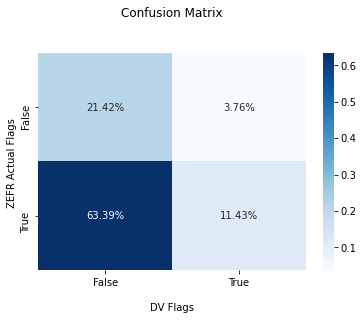

In [82]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nDV Flags')
ax.set_ylabel('ZEFR Actual Flags ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

event = low/medium/high/floor flag <br>
no event = minimal flag <br>

True Positive = ZEFR-flagged videos, ALSO flagged by DV <br>
False Positive = ZEFR-flagged videos, NOT flagged by DV <br>
True Negative = ZEFR-no flag videos, ALSO not flagged by DV <br>
False Negative = ZEFR-no flag videos, BUT flagged by DV <br>

This dataset is where there is a ZEFR flag (minimal included) <br>
and there is a ZEFR GARM category